In [1]:
import sys

In [2]:
sys.path.append("../src")
sys.path.append("..")

In [3]:
from gge import sensors

In [4]:
area = (12.1, 55.60, 12.2, 55.7)  # Define the area

In [5]:
# Create a Landsat instance and use it
landsat = sensors.Landsat(area, ('2024-04-01', '2024-07-01') )
landsat.download_data()


2024-06-26 13:26:56,770 - root - INFO - Initializing Earth Engine... (SatelliteData.py:21)
2024-06-26 13:26:58,310 - root - INFO - Earth Engine initialized. (SatelliteData.py:27)


No images found in collection LANDSAT/LT04/C02/T1_L2 for the given filters.
No images found in collection LANDSAT/LT05/C02/T1_L2 for the given filters.
No images found in collection LANDSAT/LE07/C02/T1_L2 for the given filters.


2024-06-26 13:27:38,499 - root - INFO - download_data executed in 40.188 seconds. (exception_handler.py:10)


or

In [6]:
# Create a Landsat instance and use it
landsat = sensors.Landsat()
landsat.area = area
landsat.time_range = ('2024-04-01', '2024-07-01') 
landsat.download_data()


No images found in collection LANDSAT/LT04/C02/T1_L2 for the given filters.
No images found in collection LANDSAT/LT05/C02/T1_L2 for the given filters.
No images found in collection LANDSAT/LE07/C02/T1_L2 for the given filters.


2024-06-26 13:25:56,814 - root - INFO - download_data executed in 44.053 seconds. (exception_handler.py:10)


In [11]:
len(landsat)

3

In [6]:
for key in landsat.images_data[0]["image_bands"].keys():
    print(landsat.images_data[0]["image_bands"][key].max())

51058
51883
57835
63409
63642
60404
63503
228
47051
8061
463
694
9986
1241
992
9933
1369
24144
112


In [7]:
landsat.dn_to_reflectance()

In [8]:
for key in landsat.images_data[0]["image_bands"].keys():
    print(landsat.images_data[0]["image_bands"][key].max())

1.2040950000000001
1.2267825
1.3904625000000002
1.5437475
1.5501550000000002
60404
1.5463325
228
47051
8061
463
694
9986
1241
992
9933
1369
24144
112


In [9]:
# Optionally, to convert back from reflectance to DN
landsat.reflectance_to_dn()

In [10]:
for key in landsat.images_data[0]["image_bands"].keys():
    print(landsat.images_data[0]["image_bands"][key].max())

51058
51883
57835
63409
63642
60404
63503
228
47051
8061
463
694
9986
1241
992
9933
1369
24144
112


We can see the RGB images if we want to 

In [11]:
%matplotlib inline

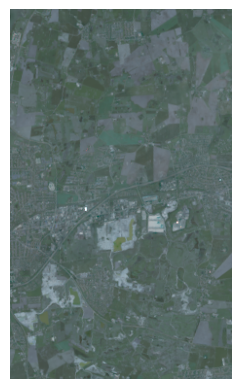

In [17]:
landsat.display_rgb(0, gamma = 0.4, gain = 1.3)

Or, we get get the items 

In [18]:
landsat.item_type = "NDWI"

In [19]:
img, meta = landsat[0]

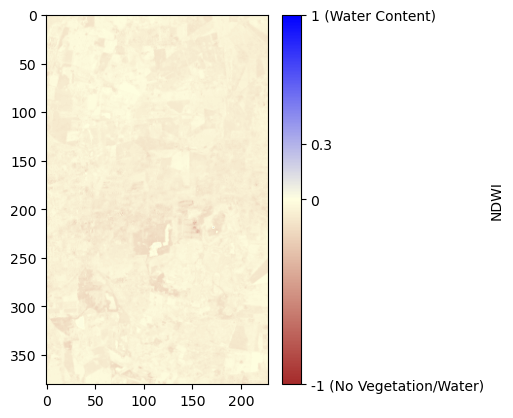

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np



# Define a custom normalization class to emphasize differences
class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

# Create a custom color map
cmap = mcolors.LinearSegmentedColormap.from_list(
    "ndwi", ["brown", "lightyellow", "blue"], N=256)

# Create a normalized color bar for the NDWI range
norm = MidpointNormalize(vmin=-1, vmax=1, midpoint=0)

# Plot the image
fig, ax = plt.subplots()
cax = ax.imshow(img, cmap=cmap, norm=norm)


# Create a color bar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=0.046, pad=0.03)
cbar.set_label('NDWI')

# Add labels to the color bar
cbar.set_ticks([-1, 0, 0.3, 1])
cbar.set_ticklabels(['-1 (No Vegetation/Water)', '0', '0.3', '1 (Water Content)'])

plt.show()


So, to get NDWI for the period

In [21]:
len(landsat)

3

In [22]:
landsat.item_type = "NDWI"

In [23]:
NWDIs = {}
for i in range(len(landsat)):
    img, meta = landsat[i]
    if i not in NWDIs:  # Check if the key does not exist
        NWDIs[i] = {}  # Initialize it as an empty dictionary
    NWDIs[i]["NDWI"] = img
    NWDIs[i]["time"] = meta["L1_DATE_PRODUCT_GENERATED"]
    NWDIs[i]["metadata"] = meta

Or, if we just want a single band

In [24]:
landsat.item_type = "SR_B4"

In [25]:
dict = {}
for i in range(len(landsat)):
    img, meta = landsat[i]
    if i not in dict:  # Check if the key does not exist
        dict[i] = {}  # Initialize it as an empty dictionary
    dict[i]["value"] = img
    dict[i]["time"] = meta["L1_DATE_PRODUCT_GENERATED"]
    dict[i]["metadata"] = meta

Similarly, we can get many different indeces and stuff

# Sentinel 3

In [5]:
# Create a Landsat instance and use it
sentinel3 = sensors.Sentinel3()

2024-06-26 13:41:11,544 - root - INFO - Initializing Earth Engine... (SatelliteData.py:21)
2024-06-26 13:41:13,411 - root - INFO - Earth Engine initialized. (SatelliteData.py:27)


In [6]:

sentinel3.area = area
sentinel3.time_range = ('2024-04-01', '2024-05-01') 
sentinel3.download_data()


2024-06-26 13:41:46,773 - googleapiclient.http - WARNING - Sleeping 1.74 seconds before retry 1 of 5 for request: POST https://earthengine.googleapis.com/v1/projects/earthengine-legacy/value:compute?prettyPrint=false&alt=json, after 500 (http.py:177)
2024-06-26 13:41:48,813 - googleapiclient.http - WARNING - Sleeping 2.95 seconds before retry 2 of 5 for request: POST https://earthengine.googleapis.com/v1/projects/earthengine-legacy/value:compute?prettyPrint=false&alt=json, after 500 (http.py:177)
2024-06-26 13:41:52,133 - googleapiclient.http - WARNING - Sleeping 1.95 seconds before retry 3 of 5 for request: POST https://earthengine.googleapis.com/v1/projects/earthengine-legacy/value:compute?prettyPrint=false&alt=json, after 500 (http.py:177)
2024-06-26 13:41:54,488 - googleapiclient.http - WARNING - Sleeping 13.61 seconds before retry 4 of 5 for request: POST https://earthengine.googleapis.com/v1/projects/earthengine-legacy/value:compute?prettyPrint=false&alt=json, after 500 (http.py:

In [8]:
sentinel3.images_data

[]